<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkML0101ENSkillsNetwork20718538-2022-01-01">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>

<h1 align="center"><font size="5">Supervised Machine Learning: Regression - Final Assignment</font></h1>


## Import the required libraries


In [ ]:
# All Libraries required for this lab are listed below. The libraries pre-installed on Skills Network Labs are commented.
# !mamba install -qy pandas==1.3.4 numpy==1.21.4 seaborn==0.9.0 matplotlib==3.5.0 scikit-learn==0.20.1
# Note: If your environment doesn't support "!mamba install", use "!pip install"

In [1]:
def warn(*args,**kwargs):
    pass
import warnings
warnings.warn=warn

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore',module ='sklearn')
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression, Lasso ,Ridge

In [3]:
pip install opendatasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.6/84.6 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 15.4 MB/s eta 0:00:00
  Created wheel for kaggle: filename=kaggle-1.6.6-py3-none-any.whl size=111946 sha256=16f3064de1f7c5eb1058d96ca2ae061b509c018337f62296f4e552f36a8cd5ef
  Stored in directory: /home/jupyterlab/.cache/pip/wheels/01/6e/1a/64e5c488564e9cfce3f76311e895556bbc1a779ee1c78e7dde
Successfully built kaggle
Note: you may need to restart the kernel to use updated packages.


## Importing the Dataset


Read your chosen dataset into pandas dataframe:


In [4]:
import opendatasets as od
od.download("https://www.kaggle.com/datasets/mirichoi0218/insurance?select=insurance.csv")

Skipping, found downloaded files in "./insurance" (use force=True to force download)


In [5]:
#!unzip ./insurance/insurance.zip
data = pd.read_csv("./insurance/insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# 1. About the Data


The dataset insurance.csv consists of 1338 rows and 7 columns which contain recorded details medical insurance cost of different people from various region of United States of America .The detils of each column/Feature is as follows

1. age : The age of primary beneficiary at the time of issue of insurance

2. sex : The gender of primary contractor either male or female

3. bmi : Body mass index for understanding of body , weight with respect to height measured in (kg/m^2)

4. children : number of dependents covered by health insurance

5. smoker : wether a person is a smoker or a non-smoker

6. region : the beneficiary's resedential region in US namely northeast,northwest,southeast,southwest

7. charges : individual's medical cost billed by health insurance.

# 2. Objectives


The main objective is to acurately predict the cost of medical insurance that person will have to bear by making the use of provided details. 

I will make use of three regression models to decide which is best in terms of predicting accurately the cost of medical insurance.

# 3. Linear Regression Models


In [24]:
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,OneHotEncoder,LabelEncoder

In [8]:
from sklearn.pipeline import Pipeline
import numpy as np
import math

In [9]:
data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [88]:
data.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


<AxesSubplot:>

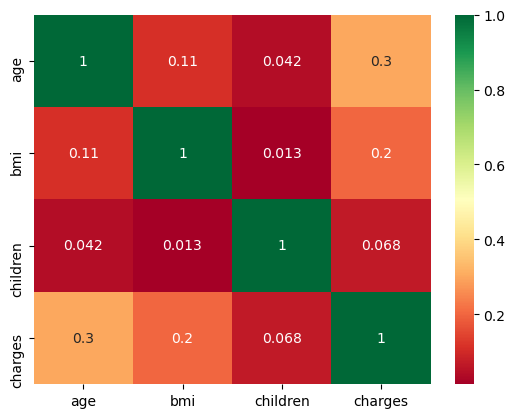

In [96]:
sns.heatmap(data = data.corr() ,cmap ="RdYlGn", annot = True)

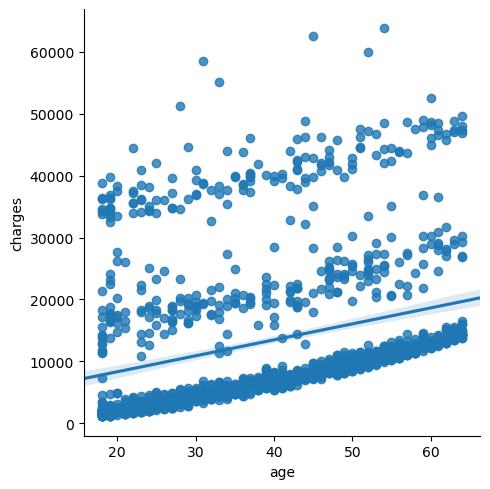

In [104]:
sns.lmplot(x ='age',y='charges',data= data)

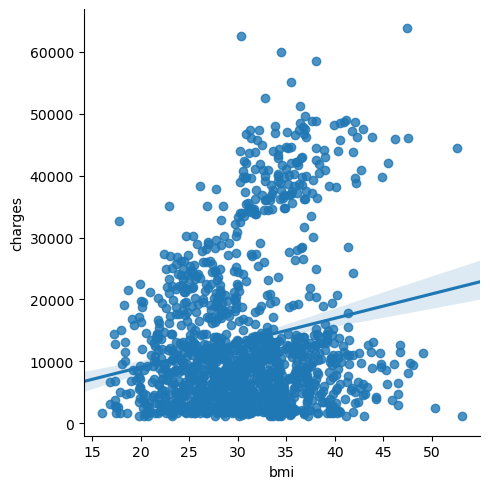

In [105]:
sns.lmplot(x ='bmi',y='charges',data= data)

In [10]:
from sklearn.metrics import r2_score
from scipy.stats import boxcox

In [11]:
mask = data.dtypes == object
ob_cols = data.columns[mask]

In [12]:
print(ob_cols)

Index(['sex', 'smoker', 'region'], dtype='object')


In [40]:
data1 = data[ob_cols]
data1.head()
data2 = data.copy()

In [41]:
data2=data2.drop((cols for cols in ob_cols), axis = 1)
y= data2['charges']
x=data2.drop("charges",axis = 1);

In [45]:
y= data2['charges']

<AxesSubplot:xlabel='charges'>

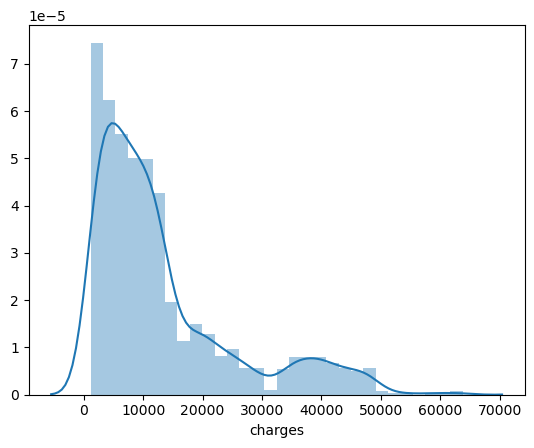

In [51]:
sns.distplot(y)

In [42]:
ohc = OneHotEncoder()
le=LabelEncoder()
for cols in ob_cols:
    dat=le.fit_transform(data1[cols]).astype(int)
    new_data = ohc.fit_transform(dat.reshape(-1,1))
    data1=data1.drop(cols,axis=1)
    col_name = ['_'.join([cols,str(x)])for x in range(new_data.shape[1])]
    new_df = pd.DataFrame(new_data.toarray(),index = data1.index,columns = col_name)
    data1 = pd.concat([data1,new_df],axis=1)

In [101]:
data2.head()

,age,bmi,children,charges
0,8.448183,27.900,0,16884.92400
1,8.115103,33.770,1,1725.55230
2,11.196144,33.000,3,4449.46200
3,12.576302,22.705,0,21984.47061
4,12.306949,28.880,0,3866.85520


In [43]:
x= pd.concat([x,data1],axis =1)

In [49]:
y_bc , ci = boxcox(y)

<AxesSubplot:>

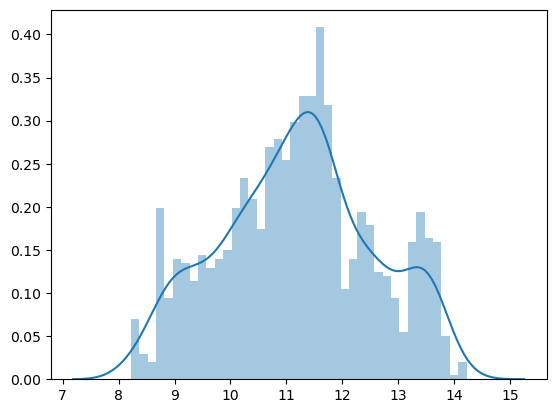

In [50]:
sns.distplot(y_bc,bins = 40,ax =plt.axes())

In [72]:
from sklearn.model_selection import KFold,GridSearchCV
kf = KFold( shuffle = True , random_state = 42, n_splits =3)
params = { 'poly_feat__degree':[1,2,3] }

In [73]:
est1 = Pipeline([("scaler",StandardScaler()),("poly_feat",PolynomialFeatures()),("model",LinearRegression())])
grid = GridSearchCV(est1,params,cv =kf)
grid.fit(x,y_bc)
y_pred = grid.predict(x)
r2_score(y_bc,y_pred)

0.8414015683432822

In [98]:
grid.best_params_ , grid.best_score_ 

({'poly_feat__degree': 2}, 0.8331491353846376)

<AxesSubplot:>

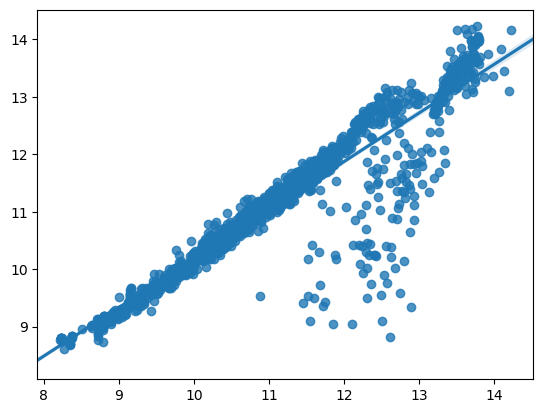

In [103]:
sns.regplot(y_bc,y_pred)

In [81]:
params2 = { 'poly_feat__degree':[1,2,3] , 'model__alpha':np.geomspace(1e-4,1e0,num=5)}
est2 = Pipeline([("scaler",StandardScaler()),("poly_feat",PolynomialFeatures()),("model",Ridge())])
grid2 = GridSearchCV(est2,params2,cv =kf)
grid2.fit(x,y_bc)
y_pred2 = grid2.predict(x)
r2_score(y_bc,y_pred2)

0.8427390756924287

In [82]:
grid2.best_params_ , grid2.best_score_

({'model__alpha': 1.0, 'poly_feat__degree': 2}, 0.8350993352546769)

<AxesSubplot:>

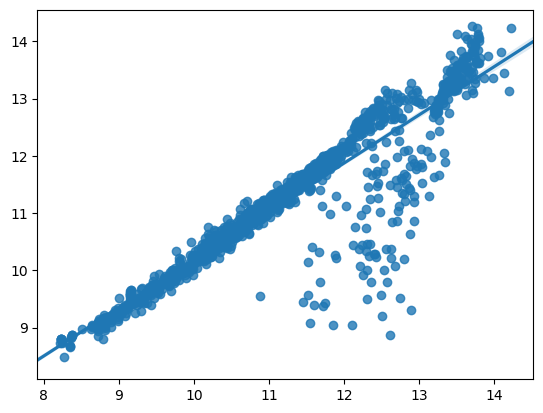

In [102]:
sns.regplot(y_bc,y_pred2)

In [83]:
params3 = { 'poly_feat__degree':[1,2,3] , 'model__alpha':np.geomspace(1e-5,1e0,num=5)}
est3 = Pipeline([("scaler",StandardScaler()),("poly_feat",PolynomialFeatures()),("model",Lasso(max_iter = 100000))])
grid3 = GridSearchCV(est3,params3,cv =kf)
grid3.fit(x,y_bc)
y_pred3 = grid3.predict(x)
r2_score(y_bc,y_pred3)

0.842569779311921

In [84]:
grid3.best_params_ , grid3.best_score_

({'model__alpha': 0.0031622776601683794, 'poly_feat__degree': 2},
 0.8358142634751522)

<AxesSubplot:>

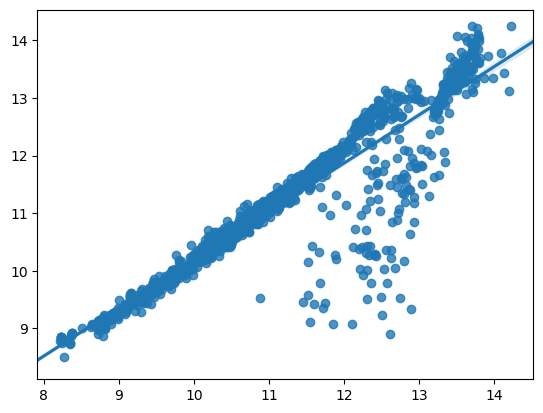

In [101]:
sns.regplot(y_bc,y_pred3)

# 4. Insights and key findings


From the above code it is clear that Ridge regression model with alpha = 1.0 and polynimial features of 2nd degree provides the best score out of the three models closely followed by Lasso regression model with alpha =  0.0031622776601683794 and containing 2nd degree polynomial features . The ridge regression provides with an accuracy rate of 84.27 % when trained and tested on same data

We can also observe from the heat map that age highly affects the charges levied by health insurance firms followed by bmi which rightly shows the real world scenario.


# 5. Next Steps


For fututre price predictions we will need to test the model on other real world data before we could actually deploy the model

There is a scope for improvement in the accuracy of this model. We need to try other models before drawing the conclusion

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>
